# Import Packages

In [2]:
# built-in modules (no install required)
import os.path

# third-party modules (pip install required)
import pandas as pd
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

pd.set_option('display.max_rows', 300)

# Load Data

In [29]:
ica_data = load_json_model('../../data/pure_precise/pure_precise.json.gz')

# Set iM to Annotate

In [30]:
iM_to_annotate = ica_data.imodulon_names[0]
iM_to_annotate

0

# Plot Gene Weights

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/plotting.py:836: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mod_cogs = ica_data.gene_table.loc[component_genes].COG


<AxesSubplot:xlabel='Gene Start', ylabel='0 Gene Weight'>

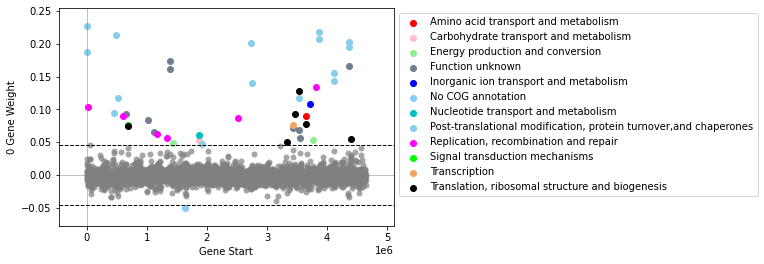

In [31]:
plot_gene_weights(ica_data, iM_to_annotate, adjust_labels=False)

# Display Current Row

In [32]:
ica_data.imodulon_table.loc[iM_to_annotate]

regulator             NaN
pvalue                NaN
qvalue                NaN
precision             NaN
recall                NaN
f1score               NaN
TP                    NaN
regulon_size          NaN
imodulon_size          45
n_regs                NaN
single_gene           NaN
exp_var          0.007519
PRECISE-1K           RpoH
pearson          0.893643
spearman           0.5643
Name: 0, dtype: object

# Show Genes

In [33]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,length
b0014,0.226539,dnaK,NaN,12163,14079,+,chaperone protein DnaK,"Post-translational modification, protein turno...",P0A6Y8,"YbiH,RpoH,gcvB",1916
b3686,0.217781,ibpB,NaN,3866469,3866897,-,small heat shock protein IbpB,"Post-translational modification, protein turno...",P0C058,"RpoN,RpoH,IHF,Lrp",428
b0473,0.214216,htpG,NaN,495120,496994,+,chaperone protein HtpG,"Post-translational modification, protein turno...",P0A6Z3,"YeiE,RpoN,RpoH,gcvB,AscG,Nac",1874
b3687,0.208022,ibpA,NaN,3867009,3867422,-,small heat shock protein IbpA,"Post-translational modification, protein turno...",P0C054,"RpoH,gcvB,Lrp,Nac",413
b4142,0.202471,groS,NaN,4370688,4370981,+,cochaperonin GroES,"Post-translational modification, protein turno...",P0A6F9,"RpoD,RpoH,gcvB,Lrp,Nac",293
b2592,0.202099,clpB,NaN,2731600,2734173,-,ClpB chaperone,"Post-translational modification, protein turno...",P63284,"RpoD,ryfD,RpoH,gcvB",2573
b4143,0.195103,groL,NaN,4371025,4372671,+,chaperonin GroEL,"Post-translational modification, protein turno...",P0A6F5,"RpoD,RpoH,Lrp",1646
b0015,0.186937,dnaJ,NaN,14168,15298,+,chaperone protein DnaJ,"Post-translational modification, protein turno...",P08622,"RpoH,ppGpp",1130
b1321,0.174363,ycjX,NaN,1384117,1385514,+,DUF463 domain-containing protein YcjX,Function unknown,P76046,"YbiH,RpoH,PgrR",1397
b4140,0.165980,fxsA,NaN,4368664,4369140,+,protein FxsA,Function unknown,P37147,"RpoH,Lrp",476


# Regulatory Enrichment

## Compute TRN Enrichment

In [35]:
trn_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=2, evidence=[0, 1, 2],
                                                 force=True, method='and')
trn_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,0,RpoH,2.233424e-49,9.955935e-45,0.822222,0.264286,0.400000,37.0,140.0,45.0,1.0
1,0,RpoH+gcvB,2.908629e-11,6.482897e-07,0.133333,0.750000,0.226415,6.0,8.0,45.0,2.0


### Update Regulator Row

In [1025]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = None

In [772]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = trn_enrichment.loc[
    6,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]

In [773]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'trn_enrich_max_regs',
        'trn_enrich_evidence',
        'trn_enrich_method'
    ]
] = [
    3,
    '[0, 1, 2]',
    'and'
]

## Specific Regulon Enrichment

If the gene list suggests >3 regulators involved simultaneously

In [160]:
iM_to_annotate

'ZraR'

In [1002]:
specific_regulon = 'RpoS,ppGpp,IHF,H-NS'.replace(',', '+')
specific_enrichment = ica_data.compute_regulon_enrichment(iM_to_annotate, specific_regulon, evidence=[0, 1, 2])
specific_enrichment

pvalue           1.799558e-08
precision        7.500000e-01
recall           3.750000e-01
f1score          5.000000e-01
TP               3.000000e+00
regulon_size     8.000000e+00
imodulon_size    4.000000e+00
n_regs           4.000000e+00
Name: RpoS+ppGpp+IHF+H-NS, dtype: float64

### Update Regulator Row

In [1003]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = specific_enrichment[
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]
ica_data.imodulon_table.loc[iM_to_annotate, 'regulator'] = specific_regulon

In [1004]:
ica_data.imodulon_table.loc[iM_to_annotate, 'compute_regulon_evidence'] = '[0, 1, 2]'

# Plot iModulon Activities

<AxesSubplot:ylabel='UC-14 iModulon\nActivity'>

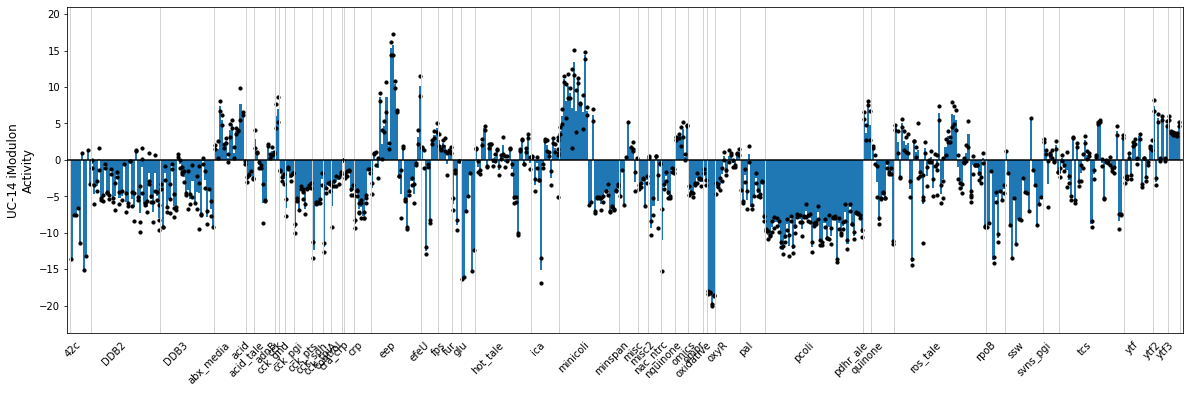

In [1520]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

## Specific Project

<AxesSubplot:ylabel='UC-7 iModulon\nActivity'>

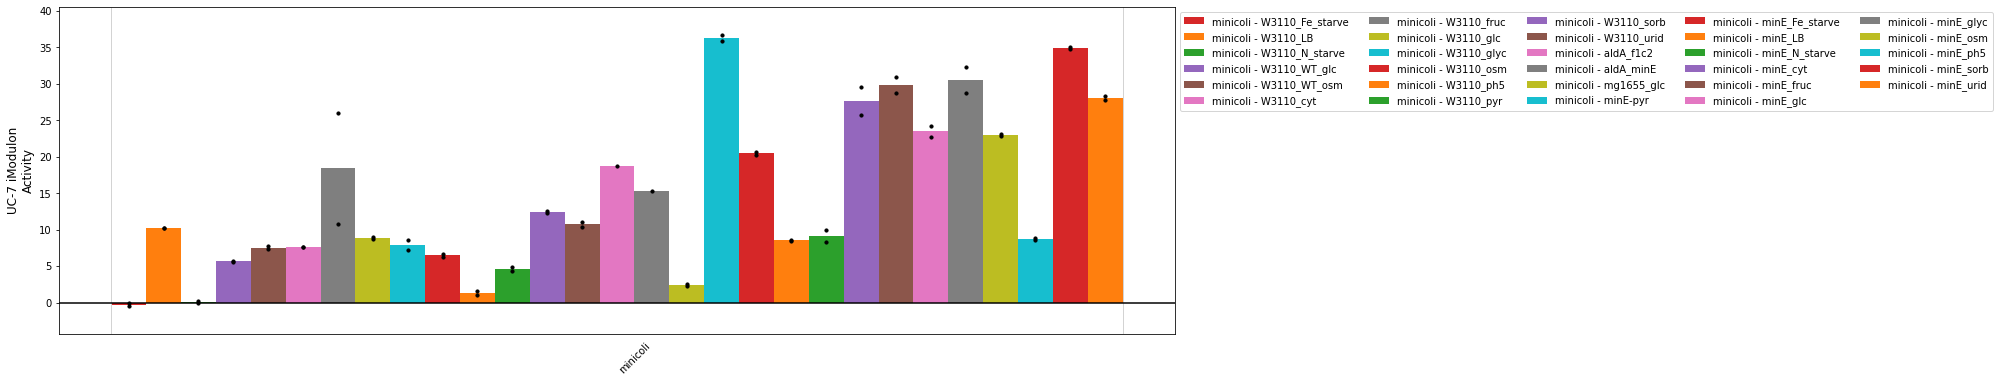

In [1421]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='minicoli', ax=ax)

## Project Metadata

In [1422]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['minicoli'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media', 'Strain Description',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH'
]]

,sample_id,Strain,Base Media,Strain Description,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH
minicoli_042,minicoli__W3110_Fe_starve__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_043,minicoli__W3110_Fe_starve__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_044,minicoli__W3110_LB__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_045,minicoli__W3110_LB__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_047,minicoli__W3110_N_starve__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_046,minicoli__W3110_N_starve__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_059,minicoli__W3110_WT_glc__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_058,minicoli__W3110_WT_glc__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_061,minicoli__W3110_WT_osm__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_060,minicoli__W3110_WT_osm__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Category/Function/Confidence

In [1506]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'enrichment_category',
        'system_category',
        'functional_category',
        'function',
        'confidence',
        'note'
    ]
] = [
    'Biological',
    'Stress Responses',
    'Extracellular Structures',
    'Cellulose biosynthesis; biofilm formation; membrane/periplasmic proteins',
    2,
    None
]

# Miscellaneous Fields

In [ ]:
ica_data.imodulon_table.loc[iM_to_annotate, 'tcs'] = True

# Update IcaData Object and Tables

## Rename iModulon

In [1507]:
iM_to_annotate

'UC-13'

In [1529]:
ica_data.rename_imodulons({'UC-14': 'UC-5'})

In [1481]:
[n for i, n in enumerate(ica_data.imodulon_names) if isinstance(n, str) and 'Iron' in n]

['Iron Uptake']

## Save Tables

In [28]:
ica_data.imodulon_table.to_csv('../../data/pure_precise/imodulon_table.csv')
ica_data.A.to_csv('../../data/pure_precise/A.csv')
ica_data.M.to_csv('../../data/pure_precise/M.csv')
save_to_json(ica_data, '../../data/pure_precise/pure_precise', compress=True)